In [1]:
# Importing all important Libraries

import pandas as pd

import numpy as np

import seaborn as sns

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

import statsmodels.api as sm

from IPython import display
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

from scipy.stats import shapiro,kstest,normaltest

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

from sklearn.preprocessing import LabelEncoder

import json

import pickle


## Problem Statement :

## Data Gathering :

In [2]:
df = pd.read_csv('Pune_House_Data.csv')
df.head()

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


## Exploratory Data Analysis :

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [4]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [5]:
df.shape

(13320, 9)

In [6]:
df.nunique()

area_type           4
availability       81
size               31
society          2688
total_sqft       2117
bath               19
balcony             4
price            1994
site_location      97
dtype: int64

In [7]:
df.dtypes

area_type         object
availability      object
size              object
society           object
total_sqft        object
bath             float64
balcony          float64
price            float64
site_location     object
dtype: object

In [8]:
df.isna().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

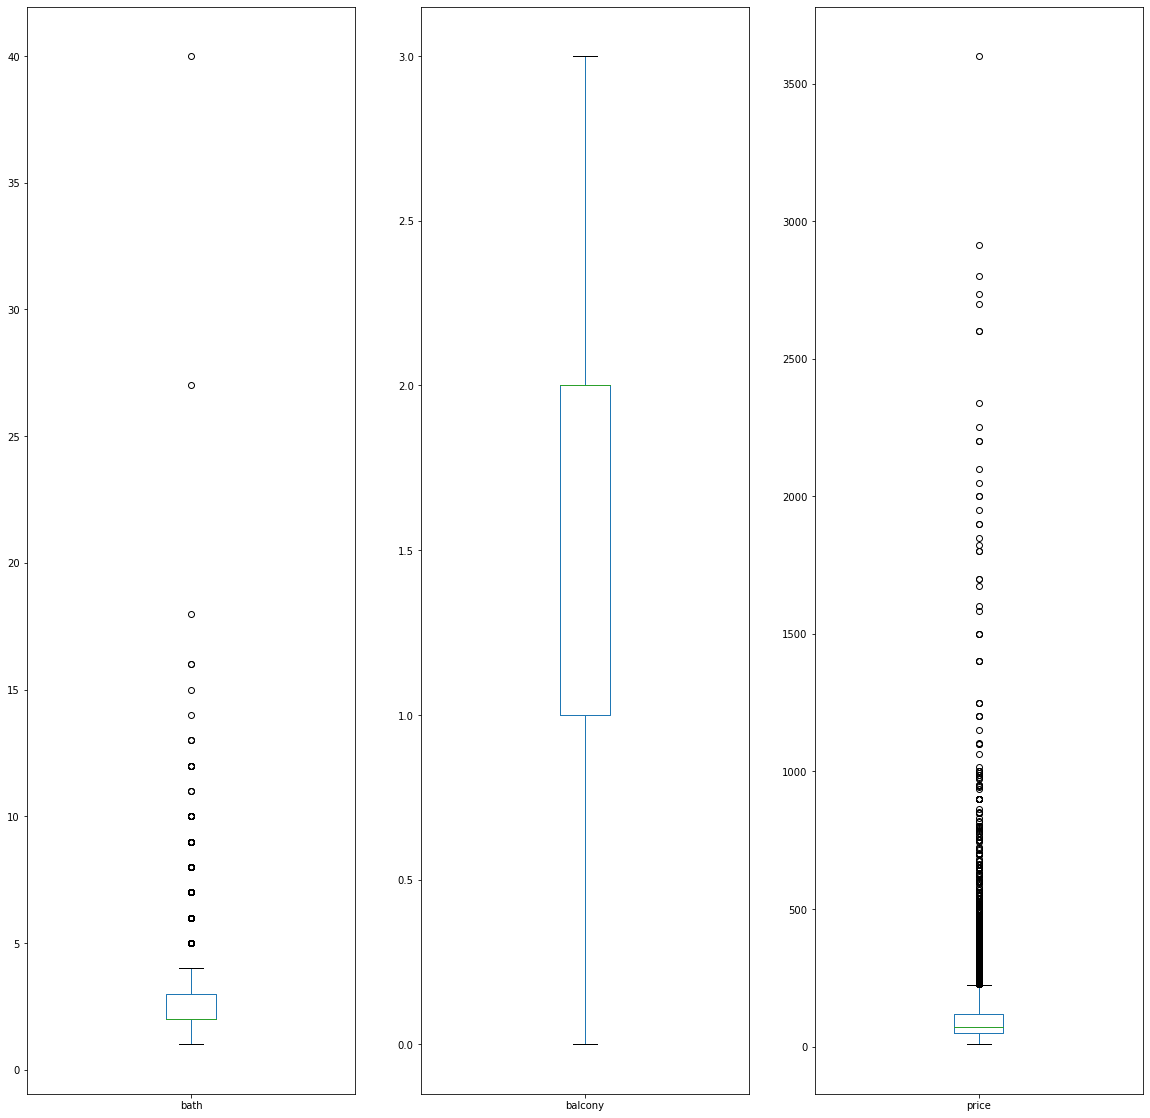

In [9]:
df.plot(kind='box',subplots=True,figsize=(20,20))
plt.show()

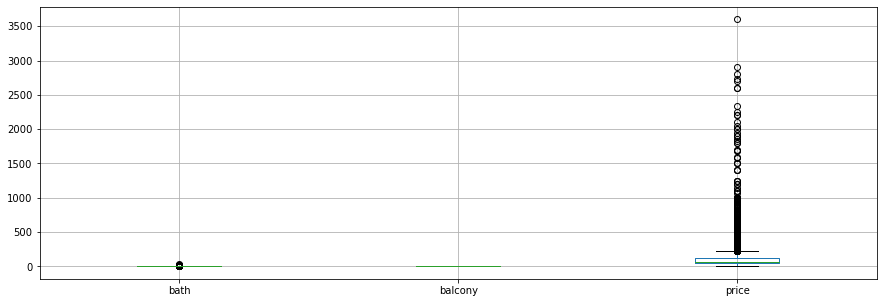

In [10]:
plt.figure(figsize=(15,5))
df.boxplot()

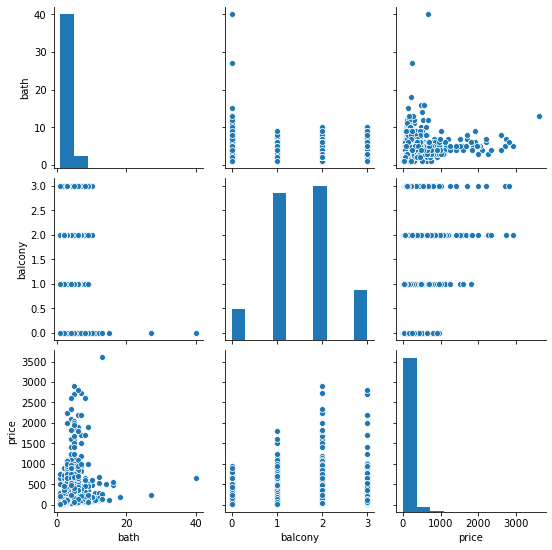

In [11]:
sns.pairplot(df)

## Feature Engineering :

## 1. area_type

In [12]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [13]:
df = pd.get_dummies(df,columns=['area_type'])
df.head()

,availability,size,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area
0,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1
1,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0
2,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0
3,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh,0,0,0,1
4,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1


## 2.  availability

In [14]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [15]:
df['availability'].replace({'19-Dec':76, 'Ready To Move':0, '18-May':25, '18-Feb':9, '18-Nov':67, '20-Dec':77,
       '17-Oct':58, '21-Dec':78, '19-Sep':53, '20-Sep':54, '18-Mar':15, '20-Feb':11,
       '18-Apr':21, '20-Aug':48, '18-Oct':59, '19-Mar':16, '17-Sep':51, '18-Dec':75,
       '17-Aug':45, '19-Apr':22, '18-Jun':32, '22-Dec':79, '22-Jan':7, '18-Aug':46,
       '19-Jan':4, '17-Jul':39, '18-Jul':40, '21-Jun':35, '20-May':27, '19-Aug':47,
       '18-Sep':52, '17-May':24, '17-Jun':31, '21-May':28, '18-Jan':3, '20-Mar':17,
       '17-Dec': 74 ,'16-Mar':13, '19-Jun':33, '22-Jun':36, '19-Jul':41, '21-Feb':12,
       'Immediate Possession':0, '19-May':26, '17-Nov':66, '20-Oct':61, '20-Jun':34,
       '19-Feb':10, '21-Oct':62, '21-Jan':6, '17-Mar':14, '17-Apr':20, '22-May':29,
       '19-Oct':60, '21-Jul':43, '21-Nov':70, '21-Mar':18, '16-Dec':73,'22-Mar':19,
       '20-Jan':5, '21-Sep':55, '21-Aug':49, '14-Nov':63, '19-Nov':68, '15-Nov':64,
       '16-Jul':38, '15-Jun':30, '17-Feb':8, '20-Nov':69, '20-Jul':42, '16-Sep':50,
       '15-Oct':56, '15-Dec':72, '16-Oct':57, '22-Nov':71, '15-Aug':44, '17-Jan':2,
       '16-Nov':65, '20-Apr':23, '16-Jan':1, '14-Jul':37},inplace=True)

In [101]:
availability_col = {'19-Dec':76, 'Ready To Move':0, '18-May':25, '18-Feb':9, '18-Nov':67, '20-Dec':77,
       '17-Oct':58, '21-Dec':78, '19-Sep':53, '20-Sep':54, '18-Mar':15, '20-Feb':11,
       '18-Apr':21, '20-Aug':48, '18-Oct':59, '19-Mar':16, '17-Sep':51, '18-Dec':75,
       '17-Aug':45, '19-Apr':22, '18-Jun':32, '22-Dec':79, '22-Jan':7, '18-Aug':46,
       '19-Jan':4, '17-Jul':39, '18-Jul':40, '21-Jun':35, '20-May':27, '19-Aug':47,
       '18-Sep':52, '17-May':24, '17-Jun':31, '21-May':28, '18-Jan':3, '20-Mar':17,
       '17-Dec': 74 ,'16-Mar':13, '19-Jun':33, '22-Jun':36, '19-Jul':41, '21-Feb':12,
       'Immediate Possession':0, '19-May':26, '17-Nov':66, '20-Oct':61, '20-Jun':34,
       '19-Feb':10, '21-Oct':62, '21-Jan':6, '17-Mar':14, '17-Apr':20, '22-May':29,
       '19-Oct':60, '21-Jul':43, '21-Nov':70, '21-Mar':18, '16-Dec':73,'22-Mar':19,
       '20-Jan':5, '21-Sep':55, '21-Aug':49, '14-Nov':63, '19-Nov':68, '15-Nov':64,
       '16-Jul':38, '15-Jun':30, '17-Feb':8, '20-Nov':69, '20-Jul':42, '16-Sep':50,
       '15-Oct':56, '15-Dec':72, '16-Oct':57, '22-Nov':71, '15-Aug':44, '17-Jan':2,
       '16-Nov':65, '20-Apr':23, '16-Jan':1, '14-Jul':37}

In [16]:
df['availability'].unique()

array([76,  0, 25,  9, 67, 77, 58, 78, 53, 54, 15, 11, 21, 48, 59, 16, 51,
       75, 45, 22, 32, 79,  7, 46,  4, 39, 40, 35, 27, 47, 52, 24, 31, 28,
        3, 17, 74, 13, 33, 36, 41, 12, 26, 66, 61, 34, 10, 62,  6, 14, 20,
       29, 60, 43, 70, 18, 73, 19,  5, 55, 49, 63, 68, 64, 38, 30,  8, 69,
       42, 50, 56, 72, 57, 71, 44,  2, 65, 23,  1, 37], dtype=int64)

## 3. size

In [17]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', nan, '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [18]:
df['size'].isna().sum()

16

In [19]:
mo = df['size'].mode()[0]
mo

'2 BHK'

In [20]:
df['size'].fillna(mo,inplace=True)

In [21]:
df = pd.get_dummies(df,columns=['size'])
df.head()

,availability,society,total_sqft,bath,balcony,price,site_location,area_type_Built-up Area,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,size_1 BHK,size_1 Bedroom,size_1 RK,size_10 BHK,size_10 Bedroom,size_11 BHK,size_11 Bedroom,size_12 Bedroom,size_13 BHK,size_14 BHK,size_16 BHK,size_18 Bedroom,size_19 BHK,size_2 BHK,size_2 Bedroom,size_27 BHK,size_3 BHK,size_3 Bedroom,size_4 BHK,size_4 Bedroom,size_43 Bedroom,size_5 BHK,size_5 Bedroom,size_6 BHK,size_6 Bedroom,size_7 BHK,size_7 Bedroom,size_8 BHK,size_8 Bedroom,size_9 BHK,size_9 Bedroom
0,76,Coomee,1056,2.0,1.0,39.07,Alandi Road,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,NaN,1440,2.0,3.0,62.00,Anandnagar,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,Soiewre,1521,3.0,1.0,95.00,Aundh,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,NaN,1200,2.0,1.0,51.00,Aundh Road,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


## 4. society

In [22]:
df['society'].unique()

array(['Coomee ', 'Theanmp', nan, ..., 'SJovest', 'ThhtsV ', 'RSntsAp'],
      dtype=object)

In [23]:
df['society'].nunique()

2688

In [24]:
df.drop('society',axis = 1,inplace=True)

## 5. total_sqft

In [25]:
df['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [26]:
df['total_sqft'].nunique()

2117

In [27]:
df['total_sqft'].isna().sum()

0

In [28]:
df['total_sqft'] = pd.to_numeric(df['total_sqft'],errors='coerce')

In [29]:
df['total_sqft'].unique()

array([1056., 2600., 1440., ..., 2758.,  774., 4689.])

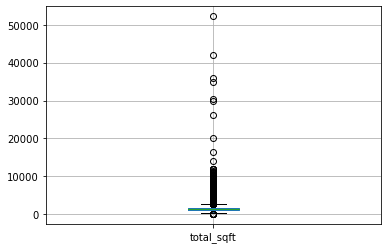

In [30]:
df[['total_sqft']].boxplot()

In [31]:
df['total_sqft'].isna().sum()

247

In [32]:
m = df['total_sqft'].mean()
m

1554.9420293735172

In [33]:
df['total_sqft'].fillna(m,inplace=True)

In [34]:
q1 = df['total_sqft'].quantile(0.25)
q2 = df['total_sqft'].quantile(0.50)
q3 = df['total_sqft'].quantile(0.75)

IQR = q3 - q1
m = df['total_sqft'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

2490.0
266.0


In [35]:
df['total_sqft'].loc[df['total_sqft']>upper_tail]

1         2600.00
6         2732.00
7         3300.00
11        2785.00
18        2770.00
22        2800.00
60        4395.00
62        5700.00
64        3000.00
77        2511.00
79        4400.00
85        3000.00
96        2894.00
100       2502.00
114       3700.00
115       2497.00
123       2650.00
140       5000.00
141       3050.00
145       4000.00
153       2795.00
159       3750.00
163       4200.00
210       2850.00
216       3600.00
238       3500.00
241       2600.00
248       4050.00
259       3045.00
260       2900.00
277       4111.00
332       2650.00
337       3122.00
358       3252.00
401       3252.00
408      12000.00
440      11890.00
455       3309.00
459       5000.00
477       4800.00
485       3600.00
490       4500.00
514       8500.00
516       2805.00
518       3000.00
524       5230.00
528       3000.00
538       5000.00
539       3000.00
545       2610.00
547       2845.00
550       3450.00
570       4144.00
583       2500.00
600       2791.00
605      1

In [36]:
df['total_sqft'].loc[df['total_sqft']>upper_tail]=upper_tail

In [37]:
df['total_sqft'].loc[df['total_sqft']>upper_tail]

Series([], Name: total_sqft, dtype: float64)

In [38]:
df['total_sqft'].loc[df['total_sqft']<lower_tail]

349       11.0
1020      15.0
1122      24.0
4086       1.0
4972       5.0
5970      45.0
11558     60.0
13216    250.0
Name: total_sqft, dtype: float64

In [39]:
df['total_sqft'].loc[df['total_sqft']<lower_tail]=lower_tail

In [40]:
df['total_sqft'].loc[df['total_sqft']<lower_tail]

Series([], Name: total_sqft, dtype: float64)

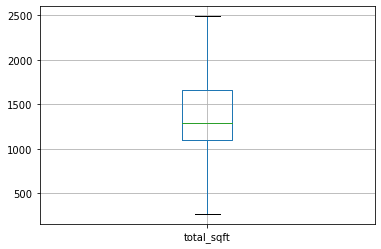

In [41]:
df[['total_sqft']].boxplot()

## 6. bath

In [42]:
df['bath'].unique()

array([ 2.,  5.,  3.,  4.,  6.,  1.,  9., nan,  8.,  7., 11., 10., 14.,
       27., 12., 16., 40., 15., 13., 18.])

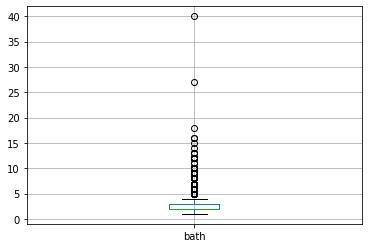

In [43]:
df[['bath']].boxplot()

In [44]:
df['bath'].isna().sum()

73

In [45]:
m = df['bath'].median()
m

2.0

In [46]:
df['bath'].fillna(m,inplace=True)

In [47]:
q1 = df['bath'].quantile(0.25)
q2 = df['bath'].quantile(0.50)
q3 = df['bath'].quantile(0.75)

IQR = q3 - q1
m = df['bath'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

4.5
0.5


In [48]:
df['bath'].loc[df['bath']>upper_tail]

1         5.0
9         6.0
11        5.0
22        5.0
45        9.0
62        5.0
64        8.0
68        7.0
79        6.0
84        5.0
85        7.0
89        6.0
129       7.0
140       8.0
141       5.0
145       7.0
149       5.0
170       6.0
192       5.0
193       7.0
209       6.0
216       6.0
238       5.0
241       8.0
258       5.0
282       6.0
315       5.0
337       6.0
358       5.0
370       5.0
408       6.0
413       7.0
425       5.0
434       8.0
459       9.0
483       5.0
490       7.0
516       5.0
518       5.0
524       6.0
538       9.0
547       5.0
550       5.0
554       6.0
605       7.0
609       5.0
610       5.0
615       5.0
639       5.0
648       9.0
656       5.0
677       7.0
679       5.0
736       5.0
749       5.0
770       9.0
783       7.0
838       6.0
885       6.0
888       5.0
889       5.0
928       5.0
935       5.0
938      11.0
950       5.0
953       5.0
991       6.0
1018      7.0
1024      7.0
1033      5.0
1038      5.0
1044  

In [49]:
df['bath'].loc[df['bath']>upper_tail]=upper_tail

In [50]:
df['bath'].loc[df['bath']>upper_tail]

Series([], Name: bath, dtype: float64)

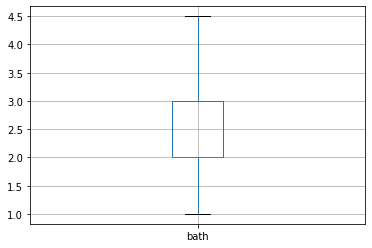

In [51]:
df[['bath']].boxplot()

In [52]:
df['bath'].isna().sum()

0

## 7. balcony

In [53]:
df['balcony'].unique()

array([ 1.,  3., nan,  2.,  0.])

In [54]:
df['balcony'].isna().sum()

609

In [55]:
m = df['balcony'].mean()
m

1.5843757375501535

In [56]:
df['balcony'].fillna(m,inplace=True)

In [57]:
df['balcony'].isna().sum()

0

In [58]:
df['balcony'].unique()

array([1.        , 3.        , 1.58437574, 2.        , 0.        ])

## 8. site_location

In [61]:
df['site_location'].unique()

array(['Alandi Road', 'Ambegaon Budruk', 'Anandnagar', 'Aundh',
       'Aundh Road', 'Balaji Nagar', 'Baner', 'Baner road',
       'Bhandarkar Road', 'Bhavani Peth', 'Bibvewadi', 'Bopodi',
       'Budhwar Peth', 'Bund Garden Road', 'Camp', 'Chandan Nagar',
       'Dapodi', 'Deccan Gymkhana', 'Dehu Road', 'Dhankawadi',
       'Dhayari Phata', 'Dhole Patil Road', 'Erandwane', 'Fatima Nagar',
       'Fergusson College Road', 'Ganesh Peth', 'Ganeshkhind',
       'Ghorpade Peth', 'other', 'Gokhale Nagar', 'Gultekdi',
       'Guruwar peth', 'Hadapsar', 'Hadapsar Industrial Estate',
       'Hingne Khurd', 'Jangali Maharaj Road', 'Kalyani Nagar',
       'Karve Nagar', 'Karve Road', 'Kasba Peth', 'Katraj', 'Khadaki',
       'Khadki', 'Kharadi', 'Kondhwa', 'Kondhwa Budruk', 'Kondhwa Khurd',
       'Koregaon Park', 'Kothrud', 'Law College Road', 'Laxmi Road',
       'Lulla Nagar', 'Mahatma Gandhi Road', 'Mangalwar peth',
       'Manik Bagh', 'Market yard', 'Model colony', 'Mukund Nagar',
       '

In [62]:
df['site_location'].isna().sum()

1

In [63]:
mo = df['site_location'].mode()[0]
mo

'Alandi Road'

In [64]:
df['site_location'].fillna(mo,inplace=True)

In [65]:
site_location_col = df['site_location'].value_counts().to_dict()

In [66]:
label = LabelEncoder()
df['site_location'] = label.fit_transform(df['site_location'])

In [67]:
df['site_location'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 96, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
       85, 86, 87, 90, 88, 89, 91, 92, 93, 94, 95, 28])

## 9. price :

In [68]:
df['price'].unique()

array([ 39.07, 120.  ,  62.  , ...,  40.14, 231.  , 488.  ])

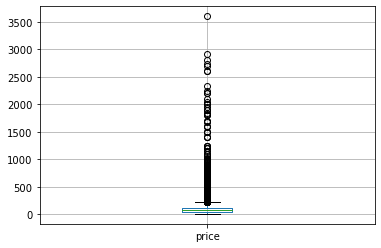

In [71]:
df[['price']].boxplot()

In [72]:
q1 = df['price'].quantile(0.25)
q2 = df['price'].quantile(0.50)
q3 = df['price'].quantile(0.75)

IQR = q3 - q1
m = df['price'].median()

upper_tail = q3 + 1.5 * IQR
lower_tail = q1 - 1.5 * IQR

print(upper_tail)
print(lower_tail)

225.0
-55.0


In [73]:
df['price'].loc[df['price']>upper_tail]

7         600.0
9         370.0
11        295.0
18        290.0
22        380.0
60        240.0
62        650.0
79        250.0
96        245.0
107       229.0
122       477.0
140       250.0
153       235.0
159       760.0
163       420.0
185       300.0
192       325.0
193       250.0
210       428.0
225       260.0
248       280.0
260       300.0
277       250.0
282       250.0
324       415.0
325       400.0
337       230.0
355       365.0
358       335.0
362       230.0
373       275.0
401       230.0
407       410.0
408      2200.0
413       250.0
434       250.0
435       240.0
440       700.0
451       252.0
455       325.0
459       360.0
472       230.0
477       235.0
480       260.0
485       400.0
490       337.0
518       275.0
524       465.0
534       245.0
539       528.0
545       499.0
550       260.0
566       300.0
570       315.0
583       313.0
605      2200.0
609       260.0
610       425.0
615       250.0
618       360.0
634       250.0
639       325.0
641     

In [74]:
df['price'].loc[df['price']>upper_tail]=upper_tail

In [75]:
df['price'].loc[df['price']>upper_tail]

Series([], Name: price, dtype: float64)

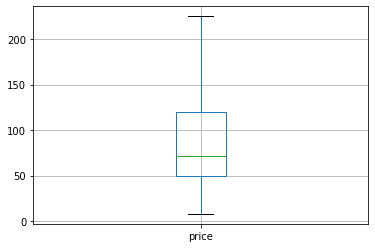

In [76]:
df[['price']].boxplot()

## Feature Selection :

## Linearity :

In [77]:
r = df.corr()[['price']]
r

,price
availability,-0.081110
total_sqft,0.742055
bath,0.707142
balcony,0.163739
price,1.000000
site_location,-0.027315
area_type_Built-up Area,-0.016116
area_type_Carpet Area,-0.011683
area_type_Plot Area,0.360002
area_type_Super built-up Area,-0.257746


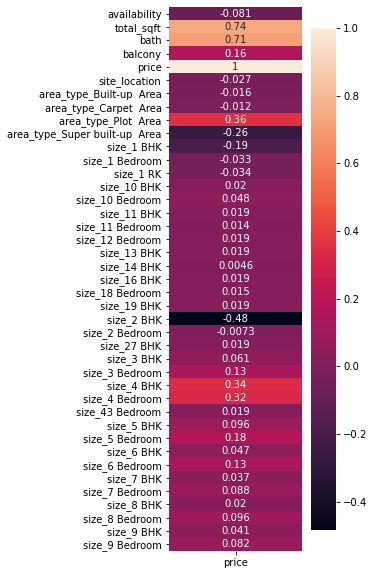

In [78]:
plt.figure(figsize=(3,10))
sns.heatmap(r,annot=True)

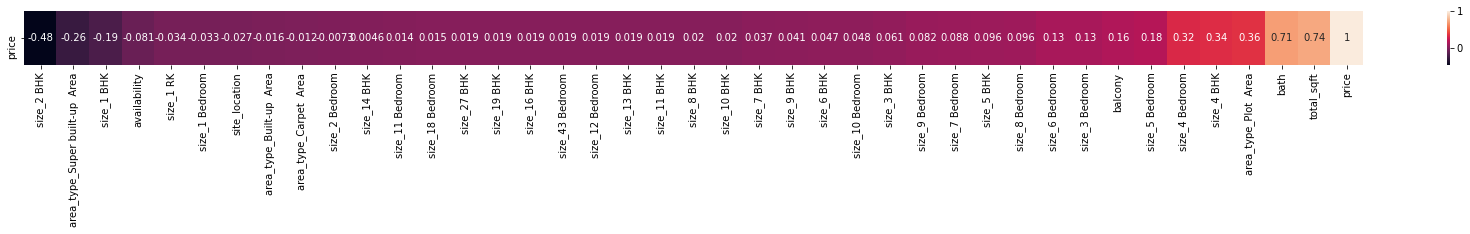

In [80]:
df1 = df.drop('price',axis = 1)

df2 = df['price']

df1.insert(40,'price',df2,allow_duplicates=True)

corr_with_price = df1.corr().tail(1).sort_values('price',axis=1)

plt.figure(figsize=(30,1))

sns.heatmap(corr_with_price,annot=True)

In [81]:
vif_list = []

for i in range(df1.shape[1]):
    
    vif = variance_inflation_factor(df1.values,i)
    
    vif_list.append(vif)
    
print(vif_list)

[1.0557995110786351, 3.2296558219725915, 4.991362593627315, 1.2325134627176688, 1.0032244450917096, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, 3.3487346897795245]


## Model Building :

In [82]:
x = df.drop('price',axis = 1)
y = df['price']

In [84]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=45)

In [85]:
model = LinearRegression()

In [86]:
model.fit(x_train,y_train)

LinearRegression()

In [87]:
y_pred_test = model.predict(x_test)

y_pred_train = model.predict(x_train)

## Model Evaluation :

In [88]:
# for testing data

mse = mean_squared_error(y_test,y_pred_test)
rmse = np.sqrt(mse)
mae_test = mean_absolute_error(y_test,y_pred_test)
acc = r2_score(y_test,y_pred_test)

print(mse)

print(rmse)

print(mae_test)

print('Testing Accuracy :',round(acc,2))

1076.5119773205026
32.81024195766472
22.946305591158012
Testing Accuracy : 0.71


In [90]:
# for training data

mse = mean_squared_error(y_train,y_pred_train)

rmse = np.sqrt(mse)

mae_train = mean_absolute_error(y_train,y_pred_train)

acc = r2_score(y_train,y_pred_train)

print(mse)

print(rmse)

print(mae_train)

print('Training Accuracy :',acc)

1063.0014775158857
32.60370343252259
22.887555104604782
Training Accuracy : 0.6998605577454715


## Normality of Residual :

In [91]:
residual = y_train - y_pred_train
residual

6880     5.263164e+00
3083    -2.246026e+01
3916     6.135119e+01
1128     4.794093e+01
3408    -1.164028e+02
3681    -1.370654e+00
9619     2.783012e+01
7302     1.883160e+01
10767    2.875155e+01
1293    -2.371430e+01
1022     5.265905e-01
278     -1.909981e+01
4065    -2.769525e+01
3554    -1.991489e+01
2539    -7.358075e+00
8156    -2.986902e+01
0       -8.429734e+00
5567    -3.686265e-01
3191     3.691257e+01
11562   -1.110761e+01
4220    -9.354348e+00
10502   -1.982886e+01
3911    -2.985683e+01
916     -3.835926e+00
10282   -2.974104e+00
502     -2.360428e+01
8653    -3.572536e+01
4776    -1.822412e+01
11827   -2.653861e+01
10245    1.796806e+01
7852     3.363384e+00
1646    -4.297533e+01
10559    1.331877e+01
12205    1.686164e+01
3158     6.743214e+01
10237    5.309451e+01
5049    -4.078555e+01
6486     4.024243e+01
8461    -1.234877e+01
2645     5.540563e-01
10231    4.033983e+00
9061    -4.545966e+01
7573    -1.153581e+01
3561    -2.460007e+01
1317    -2.909919e+01
1556     6

## 1. kdeplot

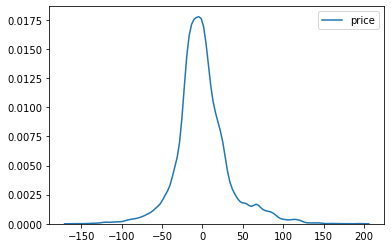

In [92]:
sns.kdeplot(residual)

## 2. qqplot

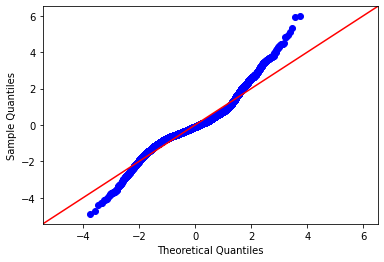

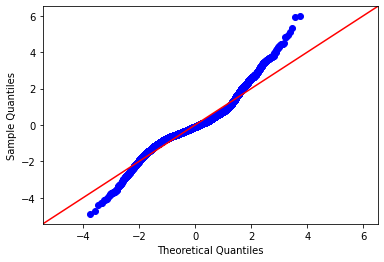

In [93]:
sm.qqplot(residual,line='45',fit=True)

## 3. Hypothessis Testing :

## 1. shapiro test :

In [94]:
_,p_value = shapiro(residual)

print('p_value :',p_value)

if p_value >= 0.05:
    
    print('Residual is Normally Distributed')
    
else :
    
    print('Residual is Not Normally Distributed...')

p_value : 0.0
Residual is Not Normally Distributed...


## 2. kstest

In [95]:
_,p_value = kstest(residual,'norm')

print('p_value :',p_value)

if p_value >= 0.05 :
    
    print('Residual is Normally Distributed ..')
    
else :
    
    print('Residual is Not Normally Distributed...')


p_value : 0.0
Residual is Not Normally Distributed...


## 3. normaltest

In [96]:
_,p_value = normaltest(residual)

print('p_value :',p_value)

if p_value >= 0.05:
    
    print('Residual is Noramlly Distributed...')
    
else :
    
    print('Residual is Not Normally Distributed...')

p_value : 4.855704196738828e-281
Residual is Not Normally Distributed...


## Skewness :

In [97]:
skewness = residual.skew()

print('skewness :',skewness)

if (skewness >= -0.05) & (skewness <= 0.05):
    
    print('Residual is Normally Distributed...')
    
elif skewness < -0.5:
    
    print('There is Negatively skewed distribution of Residual')
    
else :
    
    print('There is Positively Skewed Distribution of Residual...')

skewness : 0.5995918503732884
There is Positively Skewed Distribution of Residual...


## Homoscadasticity :

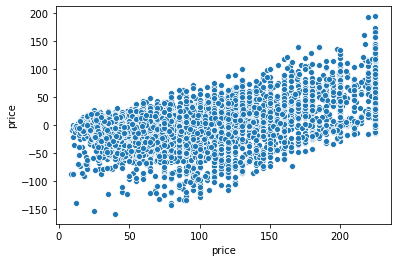

In [99]:
sns.scatterplot(x = y_train,y = residual)

## Dictionary of Encoded Columns :

In [100]:
column_names = x.columns
column_names

Index(['availability', 'total_sqft', 'bath', 'balcony', 'site_location',
       'area_type_Built-up  Area', 'area_type_Carpet  Area',
       'area_type_Plot  Area', 'area_type_Super built-up  Area', 'size_1 BHK',
       'size_1 Bedroom', 'size_1 RK', 'size_10 BHK', 'size_10 Bedroom',
       'size_11 BHK', 'size_11 Bedroom', 'size_12 Bedroom', 'size_13 BHK',
       'size_14 BHK', 'size_16 BHK', 'size_18 Bedroom', 'size_19 BHK',
       'size_2 BHK', 'size_2 Bedroom', 'size_27 BHK', 'size_3 BHK',
       'size_3 Bedroom', 'size_4 BHK', 'size_4 Bedroom', 'size_43 Bedroom',
       'size_5 BHK', 'size_5 Bedroom', 'size_6 BHK', 'size_6 Bedroom',
       'size_7 BHK', 'size_7 Bedroom', 'size_8 BHK', 'size_8 Bedroom',
       'size_9 BHK', 'size_9 Bedroom'],
      dtype='object')

In [102]:
json_data = {'availability':availability_col,'site_location':site_location_col,'column_names':list(x.columns)}
json_data

{'availability': {'19-Dec': 76,
  'Ready To Move': 0,
  '18-May': 25,
  '18-Feb': 9,
  '18-Nov': 67,
  '20-Dec': 77,
  '17-Oct': 58,
  '21-Dec': 78,
  '19-Sep': 53,
  '20-Sep': 54,
  '18-Mar': 15,
  '20-Feb': 11,
  '18-Apr': 21,
  '20-Aug': 48,
  '18-Oct': 59,
  '19-Mar': 16,
  '17-Sep': 51,
  '18-Dec': 75,
  '17-Aug': 45,
  '19-Apr': 22,
  '18-Jun': 32,
  '22-Dec': 79,
  '22-Jan': 7,
  '18-Aug': 46,
  '19-Jan': 4,
  '17-Jul': 39,
  '18-Jul': 40,
  '21-Jun': 35,
  '20-May': 27,
  '19-Aug': 47,
  '18-Sep': 52,
  '17-May': 24,
  '17-Jun': 31,
  '21-May': 28,
  '18-Jan': 3,
  '20-Mar': 17,
  '17-Dec': 74,
  '16-Mar': 13,
  '19-Jun': 33,
  '22-Jun': 36,
  '19-Jul': 41,
  '21-Feb': 12,
  'Immediate Possession': 0,
  '19-May': 26,
  '17-Nov': 66,
  '20-Oct': 61,
  '20-Jun': 34,
  '19-Feb': 10,
  '21-Oct': 62,
  '21-Jan': 6,
  '17-Mar': 14,
  '17-Apr': 20,
  '22-May': 29,
  '19-Oct': 60,
  '21-Jul': 43,
  '21-Nov': 70,
  '21-Mar': 18,
  '16-Dec': 73,
  '22-Mar': 19,
  '20-Jan': 5,
  '21-Sep':

In [103]:
# saving dictionary into json file

with open('pune.json','w') as f :
    json.dump(json_data,f)

In [104]:
# saving model into pickle file

with open('pune.pkl','wb') as f:
    pickle.dump(model,f)

## Single user Input Testing 

In [105]:
x.head(1).T

,0
availability,76.0
total_sqft,1056.0
bath,2.0
balcony,1.0
site_location,0.0
area_type_Built-up Area,0.0
area_type_Carpet Area,0.0
area_type_Plot Area,0.0
area_type_Super built-up Area,1.0
size_1 BHK,0.0


In [110]:
availability = '19-Dec'
total_sqft = '1056.0'
bath = 2.0
balcony  = 1.0
site_location  = 'Alandi Road'

area_type = 'Built-up Area'
area_type = 'area_type_' + area_type
# area_type_index = list(x.columns).index(area_type)
area_type_index = np.where(column_names == area_type)[0]

size = '1 BHK'
size = 'size_' + size
# size_index = list(x.columns).index(size)
size_index = np.where(column_names == size)[0]

In [111]:
array = np.zeros(x.shape[1])
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [112]:
array = np.zeros(len(x.columns))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.])

In [114]:
array[0] = json_data['availability'][availability]
array[1] = total_sqft
array[2] = bath
array[3] = balcony
array[4] = json_data['site_location'][site_location]

array[area_type_index] == 1 

array[size_index] == 1

array

array([7.600e+01, 1.056e+03, 2.000e+00, 1.000e+00, 1.400e+02, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
       0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00])

In [116]:
predict = model.predict([array])[0]
print('Price of Pune House is : Rs.',round(predict,2),'Lakh/-')

Price of Pune House is : Rs. 78.22 Lakh/-
